
# Learning Objectives:
- Identify the independent and dependent variables in a relationship (also known as features and target, or explanatory and response variables)
- Identify linear and nonlinear relationships from a scatterplot
- Calculate and interpret linear correlation
- Calculate and interpret the slope and intercept of a simple linear regression model
- Predict a response from a simple linear regression model
- Calculate and interpret a residual

### Let's start with an example:



Anyone who is a fan of detective TV shows has watched a scene where human remains are discovered and some sort of expert is called in to determine when the person died. But is this science fiction or science fact? Is it possible to use evidence from skeletal remains to determine how long a body has been buried (a decent approximation of how long the person has been dead)? 




Researchers sampled long bone material from bodies exhumed from coffin burials in two cemeteries in England. In each case, date of death and burial (and therefore interment time) was known. This data is given in the Longbones.csv dataset. 

**We wish to determine if there is a relationship between the nitrogen composition of the long bones of the skeleton and the length of time the body was interred.**

Source: D.R. Jarvis (1997). "Nitrogen Levels in Long Bones from Coffin Burials Interred for Periods of 26-90 Years," Forensic Science International, Vol85, pp199-208

In [1]:
#libraries
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = 'https://raw.githubusercontent.com/julianoquendoga/ga_datasets_repo/main/longbones.csv'
dataset = pd.read_csv(data_url)
dataset

,Unnamed: 0,Site,Time,Depth,Lime,Age,Nitro,Oil
0,0,1,88.5,7.00,1,NaN,3.88,1
1,1,1,88.5,NaN,1,NaN,4.00,1
2,2,1,85.2,7.00,1,NaN,3.69,1
3,3,1,71.8,7.60,1,65.0,3.88,0
4,4,1,70.6,7.50,1,42.0,3.53,0
5,5,1,68.0,7.00,1,28.0,3.93,0
6,6,1,71.6,8.00,1,35.0,3.88,0
7,7,1,70.2,6.00,1,44.0,3.64,0
8,8,1,55.5,6.00,0,29.0,3.97,0
9,9,1,36.5,6.50,0,NaN,3.85,0


The two variables we are interested in - for now - are 

- Nitro, the amount of nitrogren present in the long bones of the skeleton measured in g/100g of bone
- Time, the interment time of the body

Simple linear regression and correlation measure the *linear* relationship between two quantitative variables.

## Objective - Identify the independent and dependent variables in a relationship

Each of the two variables has a unique role in the relationship.
- The dependent variable (also known as the target, response or y variable) is the focus of our research question or experiment.  It is the variable we expect to predict.
- The independent variable (also known as a feature, explanatory or x variable) is used to make predictions in the dependent variable.

In this case, because we want to try to use the nitrogen composition of the long bones of the skeleton to predict the amount of time the body has been buried, **nitrogen is the dependent variable and interment time is the independent variable**. 

## Without Building the Model, What Can We Expect

<Axes: xlabel='Nitro', ylabel='Time'>

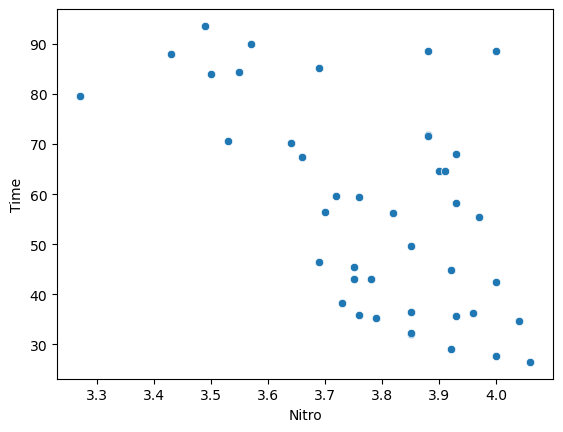

In [3]:
#scatterplot
sns.scatterplot(x = 'Nitro', y = 'Time', data=dataset)

From the scatterplot we can see that there is - maybe - a negative relationship between the amount of nitrogen still remaining in the long bones of the skeleton and the length of time the skeleton has been buried. In other words, the more nitrogen, the less time this body may have been buried.

Before we get too much farther, let's take a look at the data.

In [4]:
dataset.dtypes

Unnamed: 0      int64
Site            int64
Time          float64
Depth         float64
Lime            int64
Age           float64
Nitro         float64
Oil             int64
dtype: object

In [5]:
#find the null values
dataset.isnull()

,Unnamed: 0,Site,Time,Depth,Lime,Age,Nitro,Oil
0,False,False,False,False,False,True,False,False
1,False,False,False,True,False,True,False,False
2,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,True,False,False


First, the age of the individual at the time of death was unknown in several cases.  

It is good practice to eliminate (or impute - but we'll save that for later) missing data before building a regression model.  Even though all of the records for nitgrogen composition and interment time are complete, later we will want to be able to include age as an independent predictor, and it is missing for some records.

When we build a regression model, it is always important to build it using the same individuals every time.  It's not fair to compare the fit of a model with fewer variables and more observations to a model with more variables and fewer observations (because some of those other variables include missing data).

There is also a variable called Oil that indicates if the burial site was contaminated with fuel oil.  The study authors decided to remove those observations from their analysis because they were concerned that the oil contamination would change the natural relationship between nitrogen composition and interment time.

We can print these observations in a different color on our scatterplot to see if they fall in the general pattern of - or away from the pattern of - the overall relationship between long bone nitrogen compostion and interment time.

<Axes: xlabel='Nitro', ylabel='Time'>

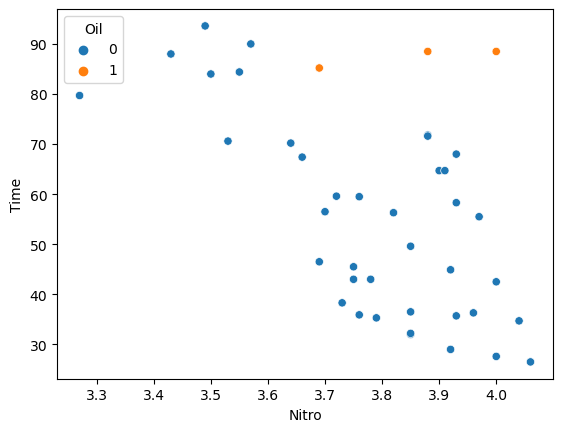

In [6]:
sns.scatterplot(x = 'Nitro', y = 'Time', data=dataset, hue = 'Oil')

Because there is a biological reason that oil contamination might obscure the true relationship between long bone nitrogen composition and interment time, we will remove those observations from our dataset before we begin our analysis.

Note that the three oil contaminated gravesites will be removed from the data when we remove the observations with a missing age or burial depth.

Something to point out here - data cleaning isn't only about removing missing data.  Sometimes we don't want to remove records with missing data because they are communicating important information, and sometimes we want to remove other records for reasons related to the subject matter - as in the case with removing the observations that were contaminated with fuel oil.

In [7]:
#Drop records with NAs and rename the dataset longbones
longbones= dataset.dropna()
longbones.shape

(35, 8)

<Axes: xlabel='Nitro', ylabel='Time'>

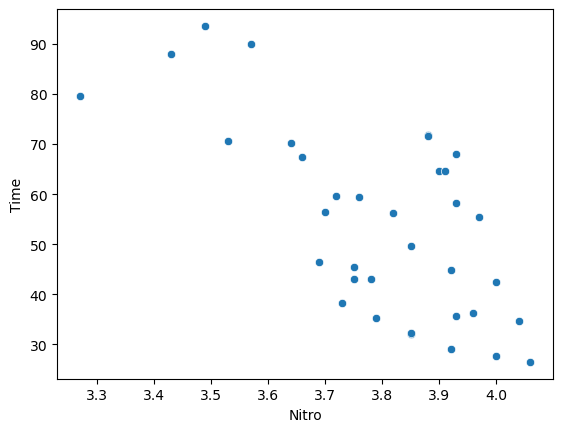

In [8]:
#Let's look at the scatterplot with the cleaned data.

sns.scatterplot(x = 'Nitro', y= 'Time', data=longbones)

There appears to be a negative association between long bone nitrogen compostiion and interment time.  More long bone nitrogen composition = shorter interment time and vice versa.

But is there a relationship between these two variables?  If so, how strong it is?

## Objective - Calculate and interpret linear correlation

A correlation coefficient measures the degree (strength) of the relationship between two variables.


- Correlation is measured on a scale of -1 to 1.  
  - -1 = perfect negative correlation, 
  - 1 = perfect positive correlation, 
  - 0 = no correlation
- The correlation of x = y is equal to the correlation of y = x
- A correlation |r| > 0.80 is considered strong and a correlation |r| < 0.20 is considered weak.






The default formula in Python for correlation is called the **Pearson correlation** We can use the .corrcoef() function in numpy to calculate the correlation between Nitro and Time in our data.  We'll show two methods - one from scipy.stats and one from numpy.

In [9]:
#scipy
from scipy import stats

stats.pearsonr(longbones['Nitro'], longbones['Time'])

PearsonRResult(statistic=-0.6705376062281427, pvalue=1.0466222859586741e-05)

In [10]:
#the above p-value is a tiny number. .00000104 This suggests you can reject the null hypothesis. There is a correlation between the two features.

Suffice it to say that the linear correlation between nitrogen composition and interrment time is -0.67.  This doesn't quite qualify as a strong correlation |r| > 0.80, but it's not weak either |r| < 0.20.  We'll say it's moderate!

## Objective - Identify linear and nonlinear relationships from a scatterplot

Let's look at some other scatterplot patterns and values of correlation for comparison.

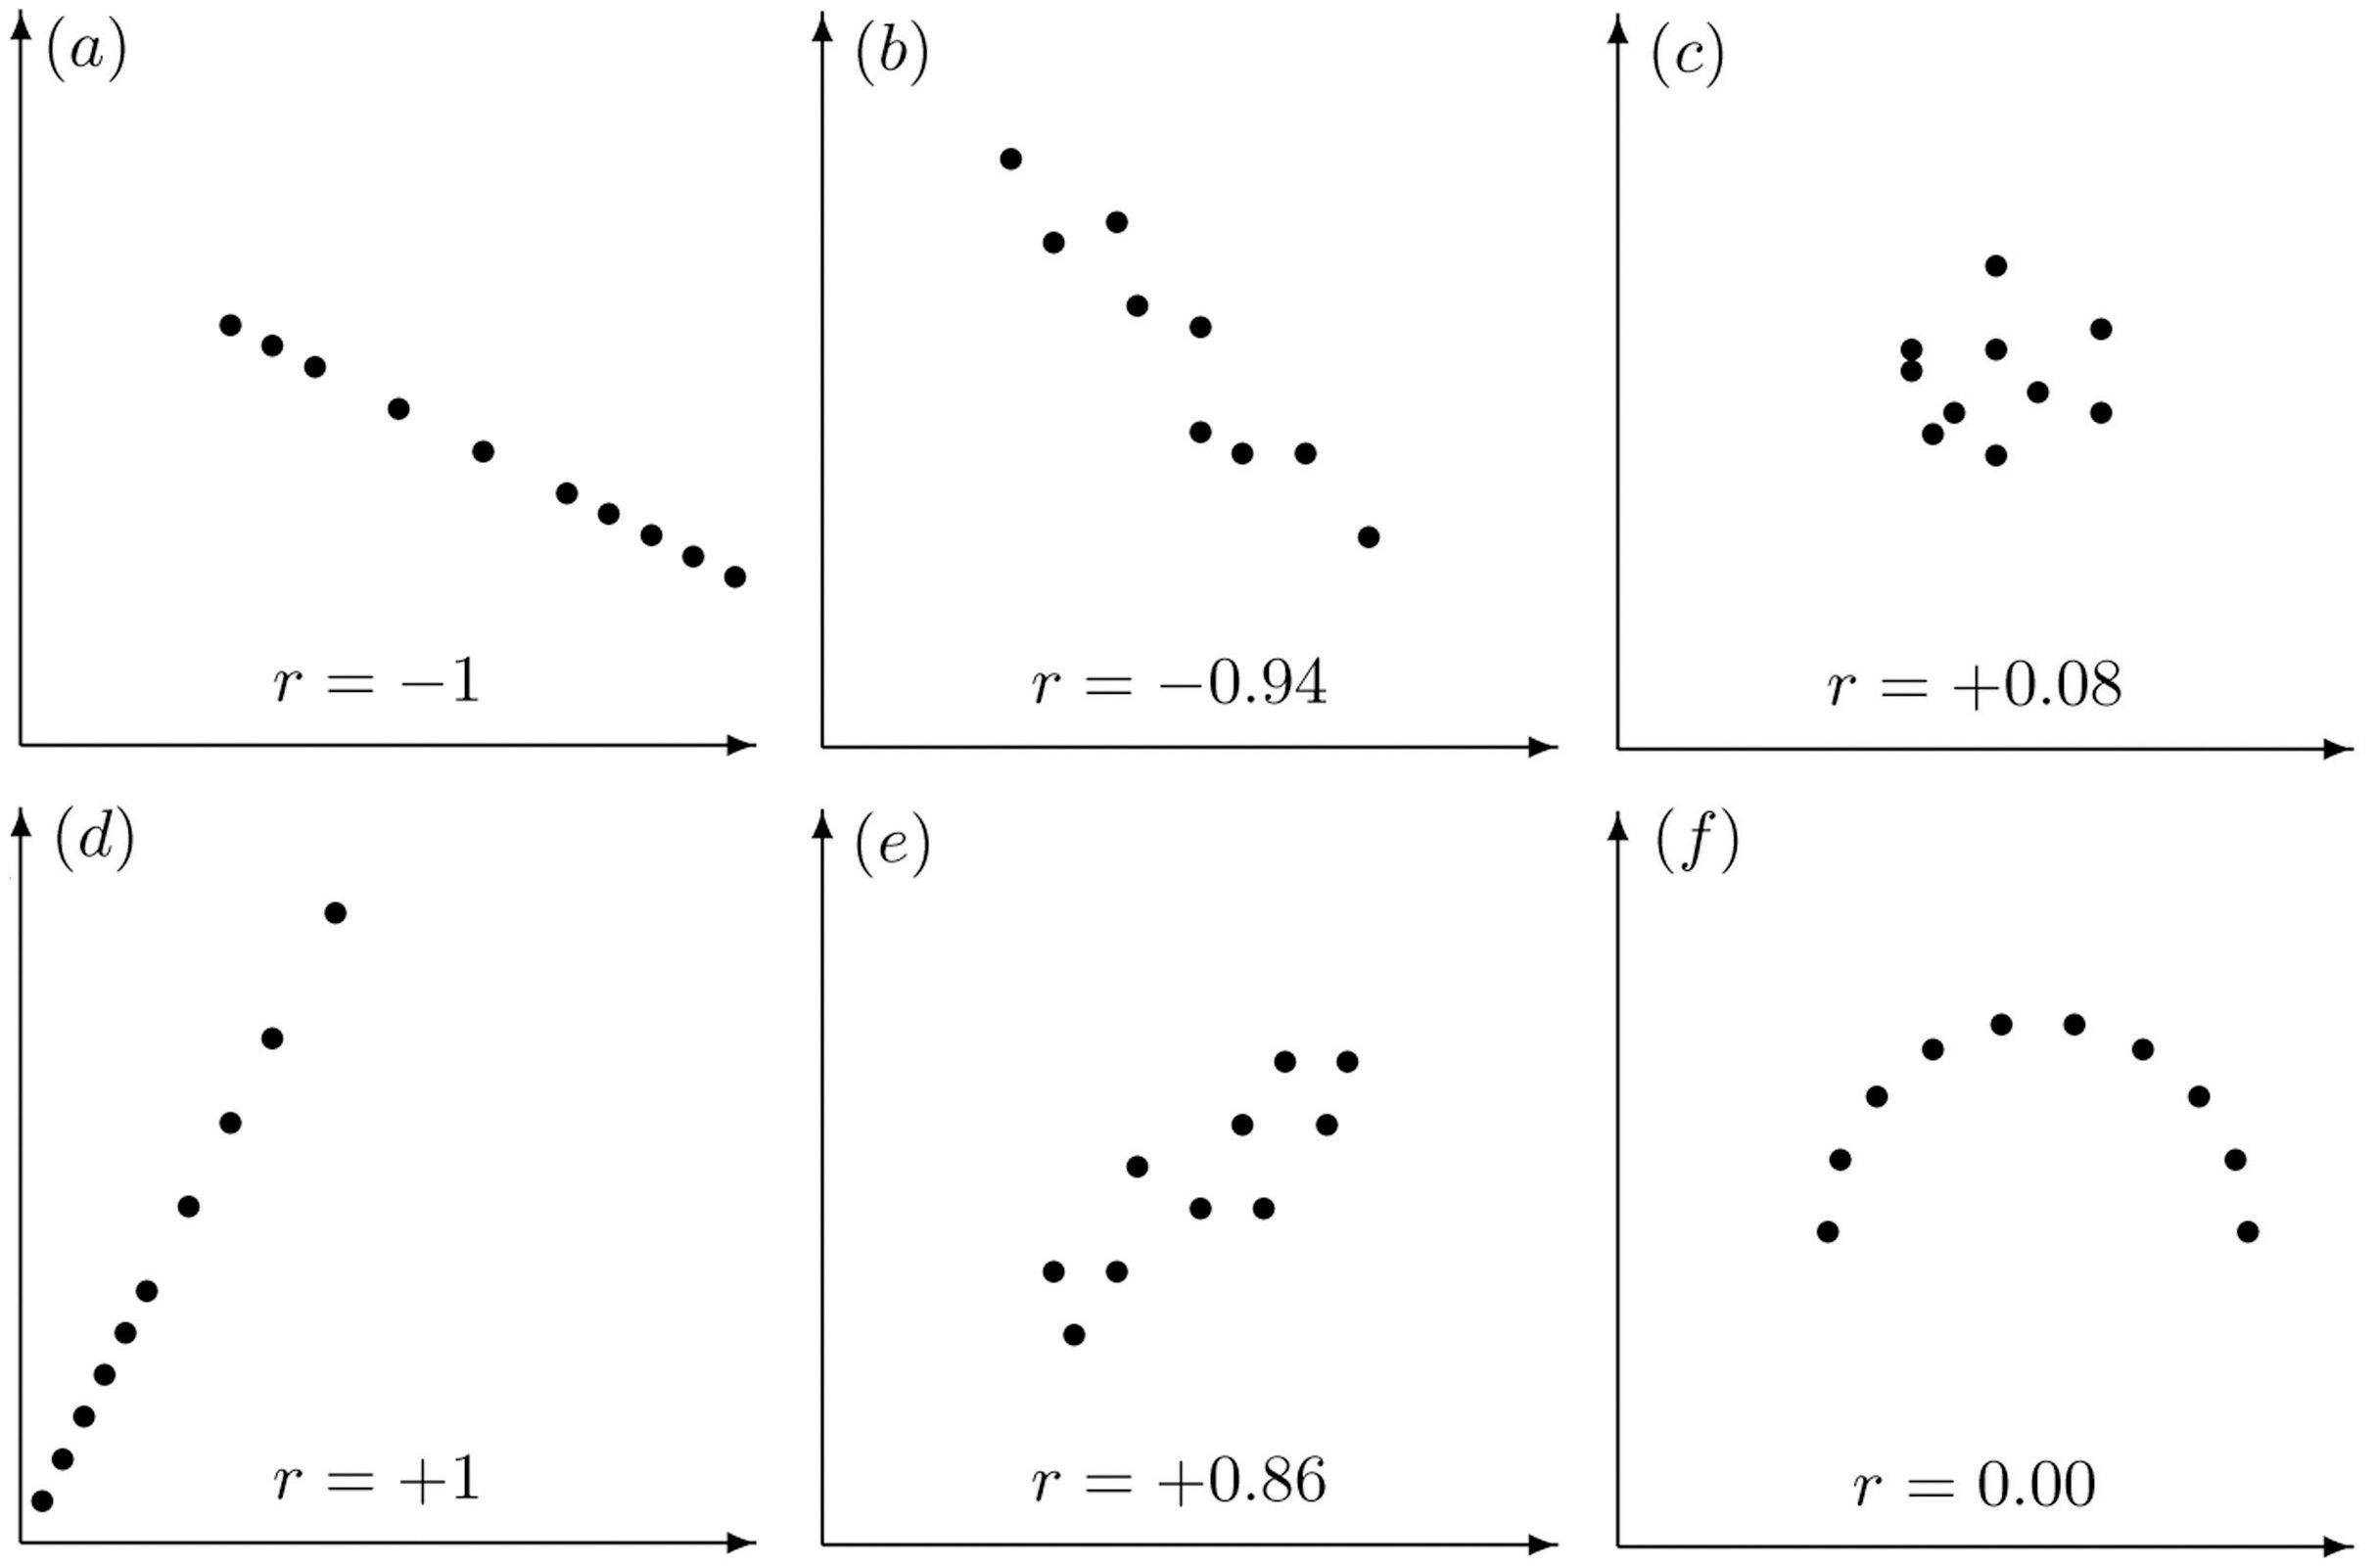

Note that in example f) there does appear to be a relationship between the two variables, it's just not a *linear* relationship, which is why the correlation is 0.

Correlation gives us a measure of how related two quantitative variables are. However, we'd like to go one step further and see if we can use a skeleton's long bone nitrogen composition to estimate how long the body has been buried.

We are going to do this by calculating the least squares regression line (also known as the line of best fit) for the data.



When dealing with real data (as opposed to working with graphs in algebra), the points in a scatterplot will never line up perfectly.  The best model of the relationship between the two variables is the straight line that comes closest to passing through all the points (knowing that it won't actually hit all of them).

The least squares regression line is the line that minimizes the squared distances from every observed point to the regression line.  That fact can be proven mathematically, though we won't do it here.

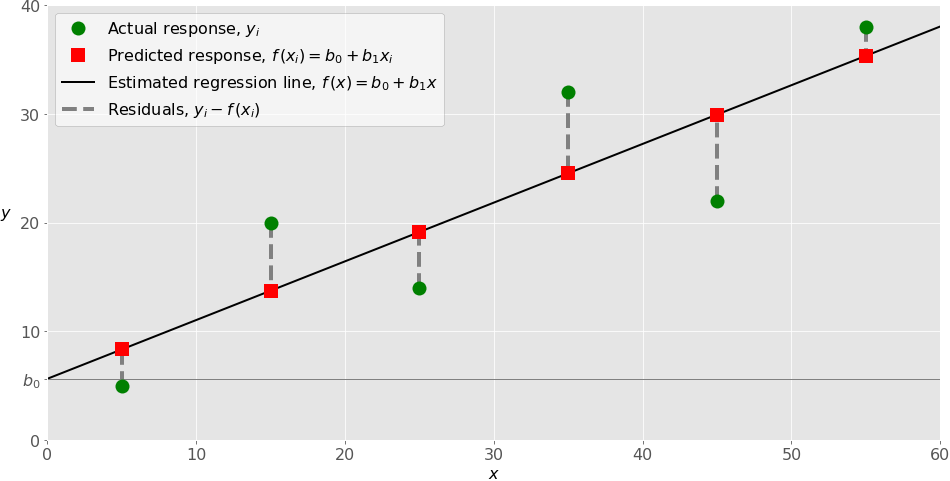

The simple linear regression equation has the form:

\begin{equation}
\hat{Y} = b_0 + b_1 X
\end{equation}

This should look reminiscent of the point-slope form of the equation of a line that you learned way back in algebra.  In that case, you wrote the equation of a line as 

\begin{equation}
y = mx + b
\end{equation}

where m was the slope of the line and b was the y-intercept (the place where the line crosses the y-axis).



The simple linear regression model equation also has a intercept and slope, we've just flipped the order: $b_0$ is the intercept and it appears first in the model and $b_1$ is the slope and it appears second.

It is possible to calculate the slope and intercept by hand; however, we will always focus on doing the calculations using Python functions.

# Objective - Calculate and interpret the slope and intercept of a simple linear regression model

Building a Model in Four Steps:

- Instantiate model.
- Fit model to the data.
- Generate predictions. (optional)
- Evaluate model.


When we "fit" a model, we are estimating the parameters of the model with our data. The process of fitting our model means to calculate the values of $\hat{\beta}_0$ and $\hat{\beta}_1$, our best guesses for what the true values of what $\beta_0$ and $\beta_1$ are.

In [11]:
from sklearn.linear_model import LinearRegression
# i is your intercept value from the linear regression model
# s is your slope value from the linear regression model

lr = LinearRegression()
#upper case for features or two-dimensional. Use 2 brackets to create value as a dataframe
X = longbones[['Nitro']].values

#lower case for vector or one dimensional 
y = longbones['Time']

#Create the LR fit
lr.fit(X, y)

LinearRegression()

In [12]:
print(lr.coef_)
print(lr.intercept_)

[-69.24270897]
316.8053232626215


We can write the linear regression model for the relationship between long bone nitrogen composition and length of interment as 

$\hat{Y} = 316.8 - 69.24 X$



What do these numbers mean, exactly?  

- The **slope** tells us the rate of change for y unit for every 1 unit change of x.
- The **intercept** tells us the locations where the line crosses the y axis when X is equal to 0.

In this case, we expect interment time to be about 69 years less for every additional gram of nitrogen per 100g of bone remaining in the long bones of the skeleton.

For example, we would expect a skeleton with 3g of nitrogen per 100g of bone to have been buried about 69.24 years longer than a skeleton with 4g of nitrogen per 100g of bone.

We need the intercept to make the regression equation work mathematically, but we don't often interpret it.  It *only* makes sense to interpret the intercept if 0 is a relevant value in our analysis.

In this case, 0 was not an x-value in the dataset, so it does not make sense to interpret the intercept.

Seaborn has a visualization tool to display the regression line over our scatterplot.

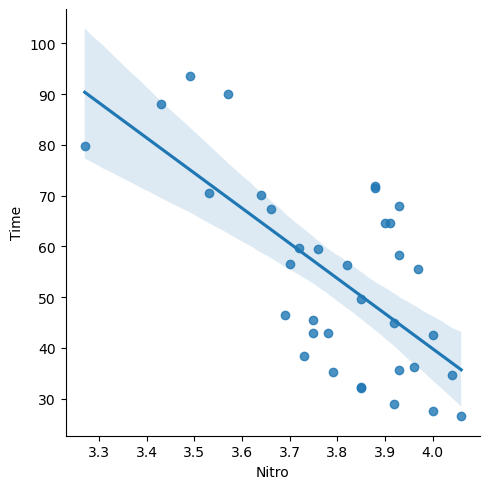

In [13]:
sns.lmplot(x='Nitro', y='Time', data = longbones)

## Assumptions of Simple Linear Regression
- Linearity: Y and X must have an approximately linear relationship.
- Independence of Errors: Errors (residuals) $\varepsilon_i$ and $\varepsilon_j$ must be independent of one another for any $i \neq j$.
- Normality: The errors (residuals) follow a Normal distribution with mean 0.
- Equality of Variances (Homoscedasticity of errors): The errors (residuals) should have a roughly consistent pattern, regardless of the value of X. (There should be no discernable relationship between X and the residuals.)

#Objective - Predict a response from a simple linear regression model

A body is discovered buried in a field.  The medical examiner's report indicates the long bones of the skeleton contain 3.65 g of nitrogen per 100g of bone.  Estimate how long the body has been buried.

In [14]:
body= 3.65

slope = lr.coef_
intercept = lr.intercept_
#y = b + mx
y = intercept + slope * body
print(y)


#or... 
lr.predict([[3.65]])

[64.06943551]


array([64.06943551])

If a skeleton is found with 3.65g of nitrogen per 100g of long bone remaining, we can state that it has been buried for about 64 years.

#Objective - Calculate and interpret a residual

A model **residual** is the difference between the observed and predicted values for a particular data point.

Let's calculate the model residual for for the first observation in the dataset.

In [15]:
body = 3.88

slope = lr.coef_
intercept = lr.intercept_
#y = b + mx
y = intercept + slope * body
print(y)

[48.14361245]


In [16]:
lr.predict([[3.88]])

array([48.14361245])

In [17]:
y_pred = lr.predict([[3.88]])
y_pred

array([48.14361245])

In [18]:
actual = longbones.loc[3, 'Time'] 
actual - y_pred

array([23.65638755])

We can see that our model *underestimated* the true interment time for that skeleton by about 23.65 years.

Some model residuals will be smaller and some larger than others.

Which leads us to...


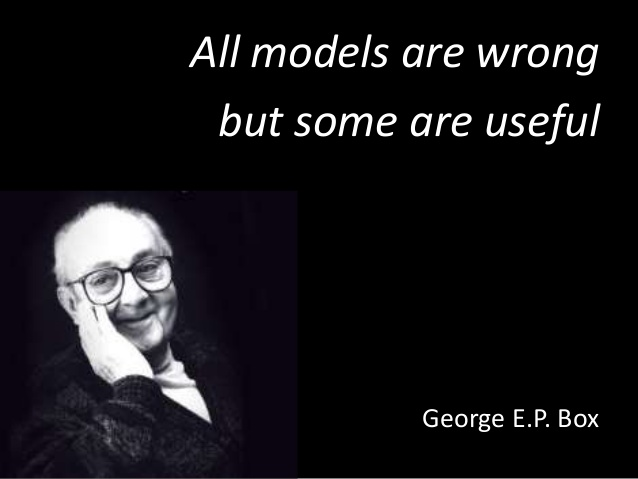

Keep in mind that our goal is to build the best, most useful model that we can - not to make perfect predictions

#Let's look at another example.

---



Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [19]:
data_url = 'https://raw.githubusercontent.com/julianoquendoga/ga_datasets_repo/main/mammal_sleep.csv'
sleep = pd.read_csv(data_url)
sleep


,Unnamed: 0,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,0,African_giant_pouched_rat,1.000,6.60,6.3,2.0,8.3,4.5,42.0,3,1,3
1,1,Asian_elephant,2547.000,4603.00,2.1,1.8,3.9,69.0,624.0,3,5,4
2,2,Baboon,10.550,179.50,9.1,0.7,9.8,27.0,180.0,4,4,4
3,3,Big_brown_bat,0.023,0.30,15.8,3.9,19.7,19.0,35.0,1,1,1
4,4,Brazilian_tapir,160.000,169.00,5.2,1.0,6.2,30.4,392.0,4,5,4
5,5,Cat,3.300,25.60,10.9,3.6,14.5,28.0,63.0,1,2,1
6,6,Chimpanzee,52.160,440.00,8.3,1.4,9.7,50.0,230.0,1,1,1
7,7,Chinchilla,0.425,6.40,11.0,1.5,12.5,7.0,112.0,5,4,4
8,8,Cow,465.000,423.00,3.2,0.7,3.9,30.0,281.0,5,5,5
9,9,Eastern_American_mole,0.075,1.20,6.3,2.1,8.4,3.5,42.0,1,1,1


How is time spent in dreaming and non-dreaming sleep related?  Do both increase together (i.e. Do mammals that sleep more get both more dreaming and non-dreaming sleep?)?  Or does a mammal that spends more time in dreaming sleep experience less non-dreaming sleep and vice versa.

Let's begin by plotting dreaming and non-dreaming sleep.  We could choose either to be the explanatiory variable, but we'll go with using non-dreaming sleep time to predict dreaming sleep time.

Text(20.125000000000007, 0.5, 'Hours spent in dreaming sleep')

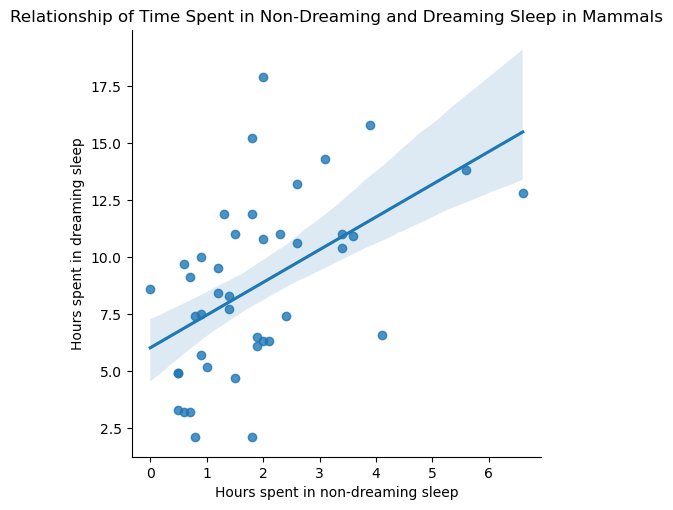

In [20]:
sns.lmplot(x ='Parasleep', y = 'SWsleep', data=sleep, ci = 90)

plt.title('Relationship of Time Spent in Non-Dreaming and Dreaming Sleep in Mammals')
plt.xlabel('Hours spent in non-dreaming sleep')
plt.ylabel('Hours spent in dreaming sleep')

Looks like there is a positive, possibly linear relationship between the two.  Both dreaming and non-dreaming sleep rise together.

Let's calculate the correlation between the two.

In [21]:
np.corrcoef(sleep['Parasleep'], sleep['SWsleep'])

array([[1.        , 0.51824287],
       [0.51824287, 1.        ]])

In [22]:
stats.pearsonr(sleep['Parasleep'], sleep['SWsleep'])

PearsonRResult(statistic=0.5182428682301411, pvalue=0.0004388331368680862)

Build Your Model Using Your Dependent and Independent Features

In [23]:
lr2 = LinearRegression()
X = sleep[['Parasleep']].values
y = sleep['SWsleep']

lr.fit(X,y)

LinearRegression()

In [24]:
print(lr.coef_)
print(lr.intercept_)

[1.43196763]
6.022118650191486




---



Humans spend about 6 hours per night in non-dreaming sleep and 2 hours in dreaming sleep.  According to this model, how many hours of dreaming sleep do we get?  What is the residual?

In [25]:
#Specify the value of x we'd like to predict
X= [[2]]

#Extract the slope and intercept values from the model paramters
intercept = lr.intercept_
slope = lr.coef_

#Use the model coefficients and plug the new value of x into the regression equation
y_pred = lr.predict(X)

print(y_pred)

#Specify the actual value of y
y = 6

#Calculate the resuidual y - y-hat
residual = y - y_pred
print(f"Residual: {residual}")


[8.88605391]
Residual: [-2.88605391]


#If You See This, it's R

In [26]:
from statsmodels.formula.api import ols


In [27]:
model = ols('Time ~ Nitro', data=longbones).fit()
model.params

Intercept    316.805323
Nitro        -69.242709
dtype: float64

In [28]:
model.predict()

array([48.14361245, 72.37856059, 44.681477  , 48.14361245, 64.7618626 ,
       41.91176864, 42.60419573, 61.29972715, 57.14516461, 57.14516461,
       45.37390409, 56.45273752, 44.681477  , 60.60730006, 52.29817498,
       55.06788334, 39.83448737, 45.37390409, 54.37545625, 75.14826895,
       69.60885223, 79.30283148, 90.38166492, 63.37700842, 46.75875827,
       46.06633118, 58.53001879, 59.22244588, 50.22089372, 50.22089372,
       35.67992483, 37.06477901, 39.83448737, 44.681477  , 50.22089372])

In [29]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     26.96
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.05e-05
Time:                        09:09:34   Log-Likelihood:                -141.08
No. Observations:                  35   AIC:                             286.2
Df Residuals:                      33   BIC:                             289.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    316.8053     50.679      6.251      0.0

# Group Practice

In [30]:
#load the diamonds dataset from seaborn, note there is a function called load_dataset for this
diamonds = sns.load_dataset('diamonds', cache = True, data_home = None)

In [31]:
#explore the datasets, which columns are numerical?
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [32]:
diamonds.shape

(53940, 10)

In [33]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [34]:
#which columns have the highest correlation with price?
stats.pearsonr(diamonds['price'], diamonds['carat'])


PearsonRResult(statistic=0.9215913011935642, pvalue=0.0)

In [49]:
#Above I chose carat after running each column one at a time. There's an easier way to do it with a loop
#With a loop
for i in diamonds.select_dtypes('float').columns:
    print(stats.pearsonr(diamonds['price'], diamonds[i]))

PearsonRResult(statistic=0.9215913011935642, pvalue=0.0)
PearsonRResult(statistic=-0.010647404584143181, pvalue=0.013403249011814432)
PearsonRResult(statistic=0.12713390212172473, pvalue=3.761533913683876e-193)
PearsonRResult(statistic=0.88443516101616, pvalue=0.0)
PearsonRResult(statistic=0.8654208978641794, pvalue=0.0)
PearsonRResult(statistic=0.8612494438514533, pvalue=0.0)


In [ ]:
#0.92 coefficient for carat is the highest linear correlation between price and all columns

In [35]:
#with your selected independent (X) variable, fit a model. 
#statsmodels and scikit-learn
#import from sklearn.linear_model import LinearRegression (already did this previously, but if not, need to do it here)
#X = independent variable: Carat
#y = dependent variable: Price

lr3 = LinearRegression()
#upper case for features or two-dimensional. Use 2 brackets to create value as a dataframe
X = diamonds[['carat']].values

#lower case for vector or one dimensional 
y = diamonds['price']

#Create the LR fit
lr3.fit(X, y)


LinearRegression()

In [36]:
#what is the slope and the intercept for your model?
print(lr3.coef_)
print(lr3.intercept_)

[7756.42561797]
-2256.36058004672


In [37]:
#using our model, predict what the price would be for the first five values listed in the diamonds dataframe?
lr3.predict
X_new = X[:5]
y_pred = lr3.predict(X_new)

y_pred


array([-472.38268791, -627.51120027, -472.38268791,   -6.99715084,
        148.13136152])

In [38]:
#what are the actual prices for the first values?
diamonds['price'].head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [39]:
#what are the residuals for those first five values?
#What do the results mean? 
    #The model appears not great in predicting diamond prices
    #Linear regression model is not the best choice for this data.
diamonds['price'].head() - y_pred

0    798.382688
1    953.511200
2    799.382688
3    340.997151
4    186.868638
Name: price, dtype: float64

In [40]:
#bonus: score your model. In other words, determine the r2 of the model. What might this tell you?


In [51]:
lr.score(X,y)

-0.9679733410817051

In [52]:
diamonds.sort_values('carat', ascending = False)

,carat,cut,color,clarity,depth,table,price,x,y,z
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
...,...,...,...,...,...,...,...,...,...,...
31592,0.20,Premium,E,VS2,59.0,60.0,367,3.81,3.78,2.24
31591,0.20,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26
31601,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


In [54]:
lr.predict([[10]])

array([20.34179493])